# EV Market Data Analysis and Purchase Prediction using Logistic Regression

## 📦 Step 1: Importing Required Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Set style for plots

In [4]:
sns.set(style="whitegrid")

## 📂 Step 2: Load the Dataset

In [5]:
file_path = "age_buynotbuy.csv"
df = pd.read_csv(file_path)

## 📊 Step 3: Overview of the Dataset

In [6]:
print("\nData Summary:\n")
print(df.info())
print("\nFirst 5 Rows:\n")
print(df.head())


Data Summary:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB
None

First 5 Rows:

   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0


## 🧼 Step 4: Check for Missing Values

In [7]:
print("\nMissing Values in Each Column:\n")
print(df.isnull().sum())


Missing Values in Each Column:

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64


## 🔍 Step 5: Descriptive Statistics

In [8]:
print("\nDescriptive Statistics:\n")
print(df.describe())


Descriptive Statistics:

           User ID          Age   AnnualSalary    Purchased
count  1000.000000  1000.000000    1000.000000  1000.000000
mean    500.500000    40.106000   72689.000000     0.402000
std     288.819436    10.707073   34488.341867     0.490547
min       1.000000    18.000000   15000.000000     0.000000
25%     250.750000    32.000000   46375.000000     0.000000
50%     500.500000    40.000000   72000.000000     0.000000
75%     750.250000    48.000000   90000.000000     1.000000
max    1000.000000    63.000000  152500.000000     1.000000


## 📈 Step 6: Visualizing the Distribution of Age

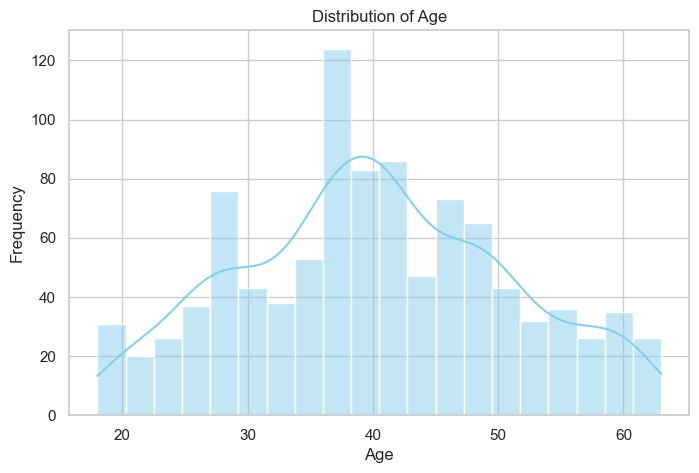

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## 📈 Step 7: Visualizing the Distribution of Annual Salary

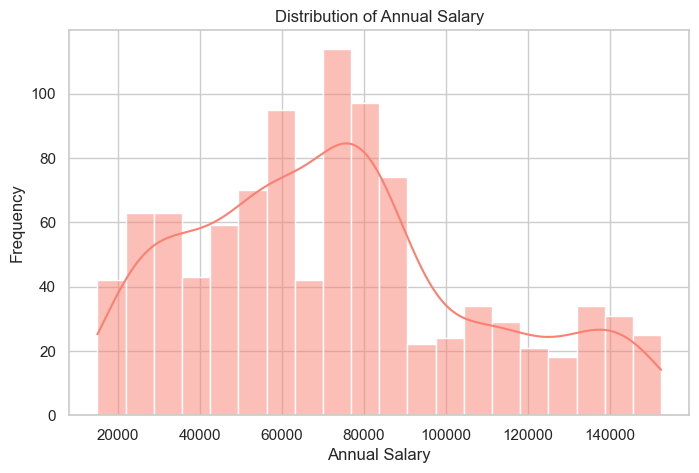

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['AnnualSalary'], kde=True, bins=20, color='salmon')
plt.title('Distribution of Annual Salary')
plt.xlabel('Annual Salary')
plt.ylabel('Frequency')
plt.show()

## 📊 Step 8: Countplot of Purchase Decision by Gender

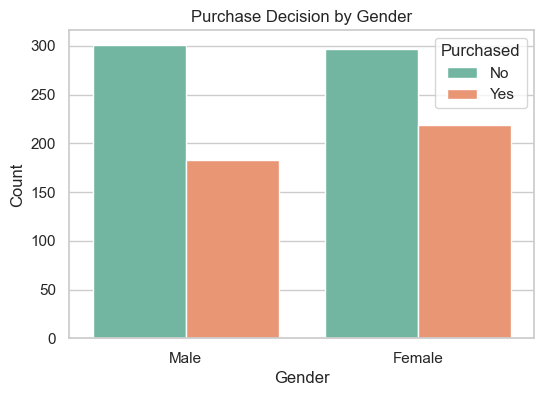

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Purchased', data=df, palette='Set2')
plt.title('Purchase Decision by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Purchased', labels=['No', 'Yes'])
plt.show()

## 📊 Step 9: Scatter Plot of Age vs Salary Colored by Purchase Decision

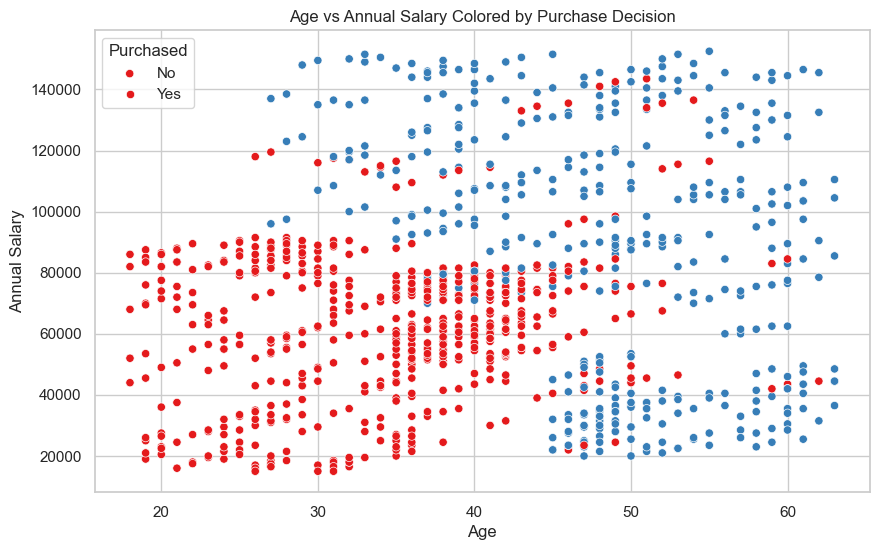

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='AnnualSalary', hue='Purchased', data=df, palette='Set1')
plt.title('Age vs Annual Salary Colored by Purchase Decision')
plt.xlabel('Age')
plt.ylabel('Annual Salary')
plt.legend(title='Purchased', labels=['No', 'Yes'])
plt.show()


## 📊 Step 10: Boxplot of Salary by Purchase Decision

C:\Users\royay\AppData\Local\Temp\ipykernel_7904\913262787.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Purchased', y='AnnualSalary', data=df, palette='pastel')


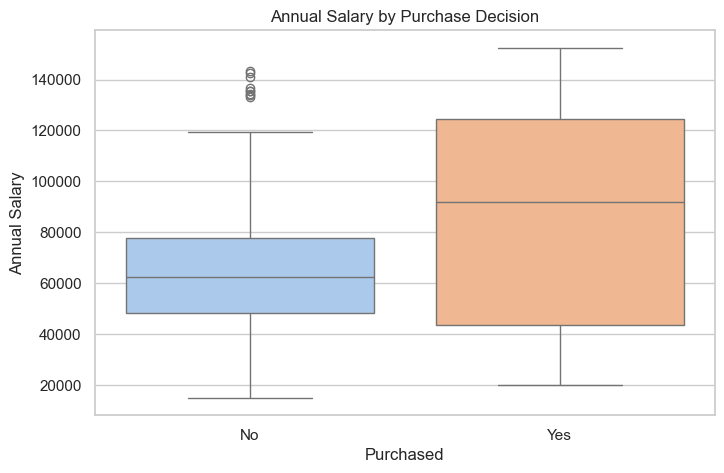

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Purchased', y='AnnualSalary', data=df, palette='pastel')
plt.title('Annual Salary by Purchase Decision')
plt.xlabel('Purchased')
plt.ylabel('Annual Salary')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 📊 Step 11: Logistic Regression Model Implementation


## Step 11.1: Encoding categorical variables (Gender)

In [14]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])


## Step 11.2: Defining features and target

In [15]:
X = df[['Age', 'AnnualSalary', 'Gender']]  # Features
y = df['Purchased']  # Target

## Step 11.3: Splitting data into training and testing sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Step 11.4: Initializing Logistic Regression model

In [17]:
model = LogisticRegression()

## Step 11.5: Training the model

In [18]:
model.fit(X_train, y_train)

LogisticRegression()


## Step 11.6: Making Predictions

In [19]:
y_pred = model.predict(X_test)


## Step 11.7: Model Evaluation

In [20]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

## Step 11.8: Displaying the results

In [21]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 80.00%
Confusion Matrix:
[[126  12]
 [ 38  74]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       138
           1       0.86      0.66      0.75       112

    accuracy                           0.80       250
   macro avg       0.81      0.79      0.79       250
weighted avg       0.81      0.80      0.80       250



## Step 11.9: Key Findings from the Logistic Regression Model

In [22]:
print("\nKey Findings:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Confusion Matrix: {conf_matrix}")
print(f"Classification Report: {class_report}")


Key Findings:
Accuracy: 80.00%
Confusion Matrix: [[126  12]
 [ 38  74]]
Classification Report:               precision    recall  f1-score   support

           0       0.77      0.91      0.83       138
           1       0.86      0.66      0.75       112

    accuracy                           0.80       250
   macro avg       0.81      0.79      0.79       250
weighted avg       0.81      0.80      0.80       250




## Step 11.10: Visualizing the Confusion Matrix

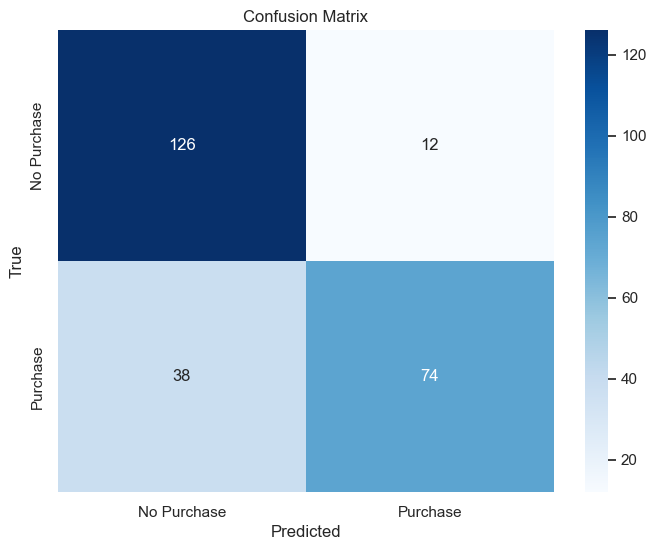

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Step 11.11: Visualizing the Classification Report

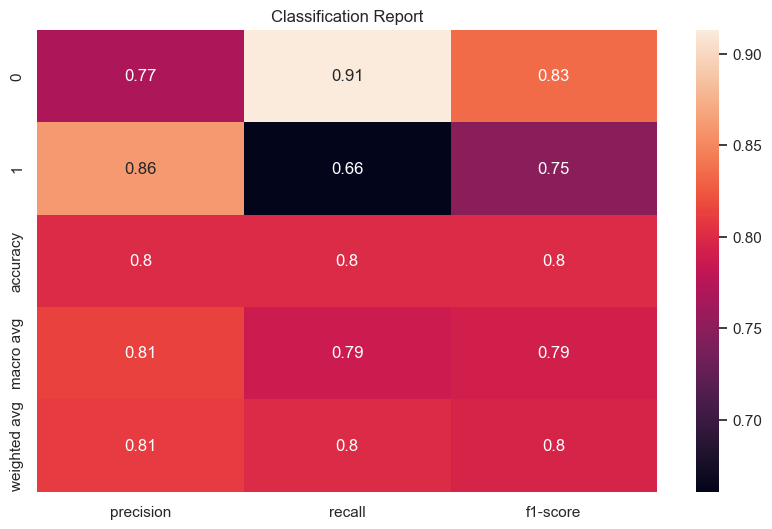

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).iloc[:-1, :].T, annot=True)
plt.title('Classification Report')
plt.show()